In [1]:
import numpy as np
from scipy import stats
from lib.DataManager import *
from lib.PolicyStats import *
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
num_states = 18
num_actions = 4
gamma = 0.95

In [3]:
histories = GetHistories("data\data.csv", gamma)

line 0
line 1000000
line 2000000
line 3000000
line 4000000
line 5000000
line 6000000
line 7000000
line 8000000
line 9000000
line 10000000
line 11000000
line 12000000
line 13000000
line 14000000
line 15000000
line 16000000
line 17000000
line 18000000
line 19000000
line 20000000
line 21000000
line 22000000
line 23000000
line 24000000
line 25000000
line 26000000
line 27000000
line 28000000
line 29000000
line 30000000
line 31000000
line 32000000
line 33000000
line 34000000
line 35000000
line 36000000
line 37000000
line 38000000
line 39000000
line 40000000
line 41000000
line 42000000
line 43000000
line 44000000
line 45000000
line 46000000
line 47000000
line 48000000
line 49000000
line 50000000
line 51000000
line 52000000
line 53000000
line 54000000
line 55000000
line 56000000
line 57000000
line 58000000
line 59000000
line 60000000
line 61000000
line 62000000


In [4]:
avg_returns = np.zeros((num_states,num_actions))
visit_count = np.zeros((num_states,num_actions))
for traj in histories:
    total_return = traj["return"]
    states = traj["St"]
    actions = traj["At"]
    avg_returns[states, actions] += total_return
    visit_count[states, actions] += 1
    
avg_returns /= visit_count
print(avg_returns)
    
    

C:\Users\mfcli\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


[[0.90173656 1.01448076 0.90366319 1.01260974]
 [0.75448454 0.85712337 0.7379564  0.8590507 ]
 [0.66805473 0.77856771 0.64050155 0.73393074]
 [0.61952511 0.74602444 0.60656186 0.62031144]
 [0.73698428 0.85936001 0.76036595 0.85967599]
 [0.68429104 0.84149655 0.68306061 0.84041333]
 [0.63822393 0.86200497 0.63668589 0.79241709]
 [0.61041572 0.92250729 0.64157463 0.68931493]
 [0.64069305 0.73516115 0.66984501 0.77909927]
 [0.64047618 0.79171919 0.64054935 0.86143708]
 [0.64400119 0.92335176 0.64277354 0.92781911]
 [0.64531241 1.17327574 0.70143849 0.83152127]
 [0.60736169 0.62182635 0.62057355 0.7481903 ]
 [0.64437295 0.68702019 0.61071078 0.92155374]
 [0.69917495 0.82731494 0.64301256 1.17192212]
 [       nan        nan        nan        nan]
 [1.54810183 1.54756594 0.79357213 0.80284125]
 [0.92112874 0.92122655 1.92610781 1.92799767]]


In [5]:
visit_count = np.zeros((num_states,num_states,num_actions))
for traj in histories:
    reward_sum = traj["Rt"].sum()
    if(reward_sum == 1):
        continue
    cur_states = traj["St"][:-1]
    next_states = traj["St"][1:]
    actions = traj["At"][:-1]
    visit_count[cur_states, next_states, actions] += 1
    
print(visit_count)
    

[[[405669.      0. 406398.      0.]
  [     0.      0.      0. 491914.]
  [     0.      0.      0.      0.]
  ...
  [     0.      0.      0.      0.]
  [     0.      0.      0.      0.]
  [     0.      0.      0.      0.]]

 [[     0.      0. 359688.      0.]
  [331602.      0.      0.      0.]
  [     0.      0.      0. 389884.]
  ...
  [     0.      0.      0.      0.]
  [     0.      0.      0.      0.]
  [     0.      0.      0.      0.]]

 [[     0.      0.      0.      0.]
  [     0.      0. 307951.      0.]
  [271848.      0.      0.      0.]
  ...
  [     0.      0.      0.      0.]
  [     0.      0.      0.      0.]
  [     0.      0.      0.      0.]]

 ...

 [[     0.      0.      0.      0.]
  [     0.      0.      0.      0.]
  [     0.      0.      0.      0.]
  ...
  [     0.      0.      0.      0.]
  [     0.      0.      0.      0.]
  [     0.      0.      0.      0.]]

 [[249261. 250186.  62699.  62886.]
  [     0.      0.      0.      0.]
  [     0.      0.      0.

In [6]:
result = ""
for i in range(visit_count.shape[0]):
    print("---state " + str(i) + "---")
    state_transitions = visit_count[i]
    possible_transitions = np.where(np.sum(state_transitions,axis=1) > 0)[0]
    for ns in possible_transitions:
        actions = list(np.where(state_transitions[ns] != 0)[0])
        result += str(i) + " " + str(ns) + " " + ",".join(str(a) for a in actions) + "\n"  
        print(ns, state_transitions[ns])
    print("------------------")
print(result)

---state 0---
0 [405669.      0. 406398.      0.]
1 [     0.      0.      0. 491914.]
4 [     0. 492558.      0.      0.]
------------------
---state 1---
0 [     0.      0. 359688.      0.]
1 [331602.      0.      0.      0.]
2 [     0.      0.      0. 389884.]
5 [     0. 395066.      0.      0.]
------------------
---state 2---
1 [     0.      0. 307951.      0.]
2 [271848.      0.      0.      0.]
3 [     0.      0.      0. 306340.]
6 [     0. 331739.      0.      0.]
------------------
---state 3---
2 [     0.      0. 265441.      0.]
3 [221831.      0.      0. 221988.]
7 [     0. 283697.      0.      0.]
------------------
---state 4---
0 [359261.      0.      0.      0.]
4 [     0.      0. 331765.      0.]
5 [     0.      0.      0. 395990.]
8 [     0. 390014.      0.      0.]
------------------
---state 5---
1 [333333.      0.      0.      0.]
4 [     0.      0. 332599.      0.]
6 [     0.      0.      0. 367305.]
9 [     0. 367315.      0.      0.]
------------------
---state 6

In [7]:
test_list = np.zeros((4,4))
possible_rewards = {}
initial_rewards = {}
heatmap = np.zeros((num_actions,num_actions,num_actions, 4,4))
for traj in histories:
    reward_sum = traj["Rt"].sum()
    possible_rewards.setdefault(reward_sum, 0)
    possible_rewards[reward_sum] += 1
    states = traj["St"][2:]
    A_states_17 = traj["At"][0]
    A_states_16 = traj["At"][1]
    R_states_17 = traj["Rt"][0]
    R_states_16 = traj["Rt"][1]
    last_reward = traj["Rt"][-1]
    
    
#     if(reward_sum != 2 and (A_states_17 == 2 or A_states_17 == 3) and (A_states_16 == 0 or A_states_16 == 1)):
#         print("wow")
    
#     if(reward_sum != 11):
#         continue
    test_list[A_states_17, A_states_16] += 1
    key = str(R_states_17) + "," + str(R_states_16) + "," + str(last_reward)
    initial_rewards.setdefault(key, 0)
    initial_rewards[key] += 1
    
    actions = traj["At"][2:]
    
    x_cords = states // 4
    y_cords = states % 4
    heatmap[A_states_17, A_states_16, actions, x_cords,y_cords] += reward_sum

In [8]:
test_list

array([[93937., 94006., 94316., 93357.],
       [93280., 93855., 93829., 93466.],
       [31177., 30854., 31481., 31386.],
       [30867., 31471., 31218., 31500.]])

In [9]:
initial_rewards

{'1.0,0.0,1.0': 124369,
 '0.0,0.0,10.0': 375078,
 '1.0,0.0,10.0': 125585,
 '0.0,0.0,1.0': 374968}

In [10]:
possible_rewards

{2.0: 124369, 10.0: 375078, 11.0: 125585, 1.0: 374968}

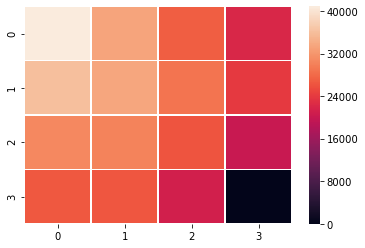

In [11]:
a_17 = 3
a_16 = 1
a = 0
ax1 = sns.heatmap(heatmap[a_17,a_16,a], linewidth=0.5)
plt.show()

In [18]:
max_traj = None
last_states = {}
for traj in histories:
    last_states[traj["St"][-1]] = 1
    if(max_traj == None or traj["return"] > max_traj["return"]):
        max_traj = traj      

In [19]:
last_states

{14: 1, 11: 1}

In [17]:
print(max_traj["St"])
print(max_traj["At"])
print(max_traj["Rt"])
print(max_traj["return"])

[17 16  0  1  2  6 10 11]
[3 3 3 3 1 1 3 1]
[ 1.  0.  0.  0.  0.  0.  0. 10.]
7.983372960937498


In [14]:
avg_exploratory_J = GetAverageReturn(histories)

Average Baseline Return : 1.172600237817154


Notes:
- You need to take (2 or 3) from both state 17 and 16 to achieve > 10 total reward.
- actions from start (2 or 3) --> (0,1) guarantee 2 total reward